In [ ]:
# this is the online learning

In [14]:
import numpy as np
import time
from grid_world import standard_grid,negative_grid
SMALL_TOL=10e-10
ALL_Actions=['U','D','L','R',]
GAMMA=0.9
ALPHA=0.2
def print_values(V, g):
  print("Values:")
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      v = V.get((i,j), 0)
      if v >= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # -ve sign takes up an extra space
    print("")


def print_policy(P, g):
  print("Policy:")
  for i in range(g.width):
    print("---------------------------")
    for j in range(g.height):
      a = P.get((i,j), ' ')
      print("  %s  |" % a, end="")
    print("")
    

In [15]:
def random_action(a, eps=0.1):
    p = np.random.random()
    if p < (1 - eps):
        return a
    else:
        return np.random.choice(ALL_Actions)

In [16]:
def max_dict(d):
    max_key=None
    max_val=float('-inf')
    for k,v in d.items():
        if v>max_val:
            max_val=v
            max_key=k
    return max_key,max_val

Main starts here!

In [17]:
grid=negative_grid()
print("rewards:")
print_values(grid.rewards,grid)

rewards:
Values:
---------------------------
-0.10|-0.10|-0.10| 1.00|
---------------------------
-0.10| 0.00|-0.10|-1.00|
---------------------------
-0.10|-0.10|-0.10|-0.10|


Values: iteration: 100000
---------------------------
 0.60| 0.79| 1.00| 0.00|
---------------------------
 0.43| 0.00| 0.79| 0.00|
---------------------------
 0.28| 0.43| 0.61| 0.42|
Policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


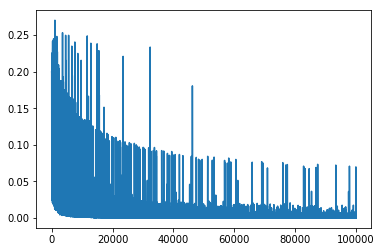

In [22]:
policy = {}
for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_Actions)

# Main starts here

# initialize Q = 0
Q = {}
returns={}
states=grid.all_states()

for s in states:
    Q[s] = {}
    for a in ALL_Actions:
        Q[s][a]=0


# value iteration
update_counts={}
update_counts_sa={}
for s in states:
    update_counts_sa[s]={}
    for a in ALL_Actions:
        update_counts_sa[s][a]=1

t=1
deltas=[]
iter_n=0
for it in range(100000):
    iter_n+=1
    print("Current iteration: "+str(iter_n),end='\r')
    if it  % 100==0:
        t+=1e-2
    s=(2,0)
    grid.set_state(s)
    a=max_dict(Q[s])[0]
    a=random_action(a,eps=0.5/t)
    biggest_change=0
    while not grid.game_over():
        r=grid.move(a)
        s2=grid.current_state()
        a2=max_dict(Q[s2])[0]
        a2=random_action(a2,eps=0.5/t)
        alpha=ALPHA/update_counts_sa[s][a]
        update_counts_sa[s][a]+=0.001
        old_qsa=Q[s][a]
        Q[s][a]=Q[s][a]+alpha*(r+GAMMA*Q[s2][a2]-Q[s][a])
        biggest_change=max(biggest_change,np.abs(old_qsa-Q[s][a]))
        update_counts[s]=update_counts.get(s,0)+1
        s=s2
        a=a2
    deltas.append(biggest_change)
       
#     time.sleep(0.001)
#check the result
V = {}
for s, Qs in Q.items():
    V[s] = max_dict(Q[s])[1]
    if s in policy:
        policy[s]=max_dict(Q[s])[0]
    
    

print_values(V,grid)
print_policy(policy,grid)

import matplotlib.pyplot as plt
plt.plot(deltas)
plt.show()